In [9]:
import os.path
import tensorflow.keras as k

folder = "models"
models = ["ave_pool_selu_lay5_little_drop_little_l2_global_ave_pooling_n32_same_augment_no_noise_fft_denoise6_residual_supervised_cfalse_nfalse_images_lfalse", "ave_pool_selu_lay3_no_drop_little_l2_global_ave_pooling_n32_zeros_afalse_no_noise_fft_denoise5_residual_mil_cfalse_nfalse_images_lfalse", "vgg3layers4"]
model_names = ["full_resnet", "mil_resnet", "full_vgg"]

In [10]:
loaded_oct_models = []
for oct_model_name in models:
    oct_model_path = os.path.join(folder, oct_model_name)
    loaded_oct_models.append(k.models.load_model(oct_model_path))

In [11]:
for model, name in zip(loaded_oct_models, model_names):
    print(f"====================  {name}  ====================")
    model.summary()

====================  full_resnet  ====================
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2044, 2048,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 2044, 2048,   320         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 2044, 2048,   9248        ['conv2d[0][0]']                 
                                32)   

In [15]:
model_names = ["full_resnet", "mil_resnet", "full_vgg"]
for model, name in zip(loaded_oct_models, model_names):
    k.utils.plot_model(model, to_file=f"{name}.png", show_shapes=True, expand_nested=True, show_layer_names=False)

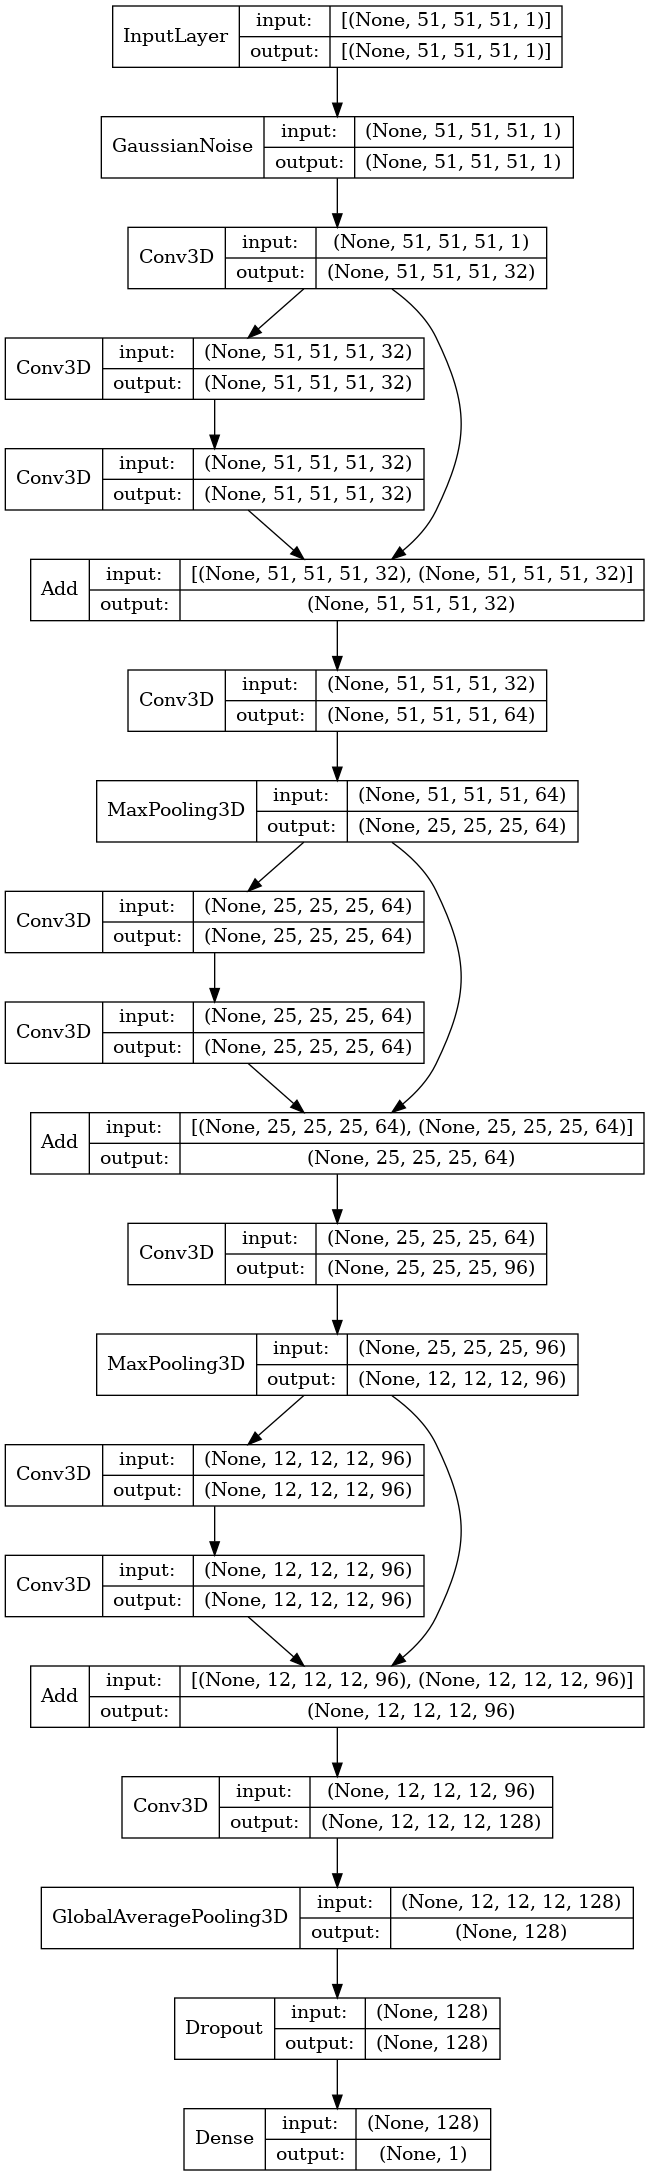

In [16]:
path = "/home/julius/dataspellprojects/oct-classifier/results/hyperparameter_study/mil/models/prec_max_pool_selu_lay3_little_drop_little_l2_global_ave_pooling_n32_same_afalse_noise_all4_fullpca_2_residual_mil_cfalse_nfalse_raw_non"
model = k.models.load_model(path)
k.utils.plot_model(model, to_file=f"rawmodel.png", show_shapes=True, expand_nested=True, show_layer_names=False)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 51, 51, 51,  0           []                               
                                 1)]                                                              
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 51, 51, 51,   0          ['input_1[0][0]']                
                                1)                                                                
                                                                                                  
 conv3d (Conv3D)                (None, 51, 51, 51,   896         ['gaussian_noise[0][0]']         
                                32)                                                           